In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptop = pd.read_csv('laptop.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
laptop.head()

,laptop_id,laptop_title,genres
0,1,Notebook 14-df0008nx,core i3|4 GB ram|1 TB HDD|GTX 1660
1,2,IdeaPad 330S-14IKB,core i5|4 GB ram|500 GB HDD|GTX 1030
2,3,MateBook D Volta,core i7|8 GB ram|1 TB HDD|GTX 1050 ti
3,4,Inspiron 15 3567,core i3|4 GB ram|1TB HDD|GTX 730
4,5,VivoBook 15 X510UR,core i5|8 GB ram|500 GB HDD|intel HD Graphics


In [4]:
ratings.head()

,userId,laptop_id,rating,timestamp
0,1,26,4.0,964982703
1,1,150,4.0,964981247
2,1,190,4.0,964982224
3,1,39,5.0,964983815
4,1,176,5.0,964982931


In [5]:
final_dataset = ratings.pivot(index='laptop_id',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,202,203,204,205,206,207,208,209,210,211
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
3,5.0,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
4,5.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,2.0,0.5,...,NaN,NaN,2.0,2.5,NaN,NaN,NaN,4.0,NaN,4.5
5,5.0,NaN,NaN,5.0,NaN,5.0,5.0,NaN,NaN,4.0,...,3.0,3.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN


In [6]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,202,203,204,205,206,207,208,209,210,211
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
3,5.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
4,5.0,4.0,4.0,4.0,0.0,4.0,0.0,0.0,2.0,0.5,...,0.0,0.0,2.0,2.5,0.0,0.0,0.0,4.0,0.0,4.5
5,5.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,4.0,...,3.0,3.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0


In [7]:
no_user_voted = ratings.groupby('laptop_id')['rating'].agg('count')
no_laptop_voted = ratings.groupby('userId')['rating'].agg('count')

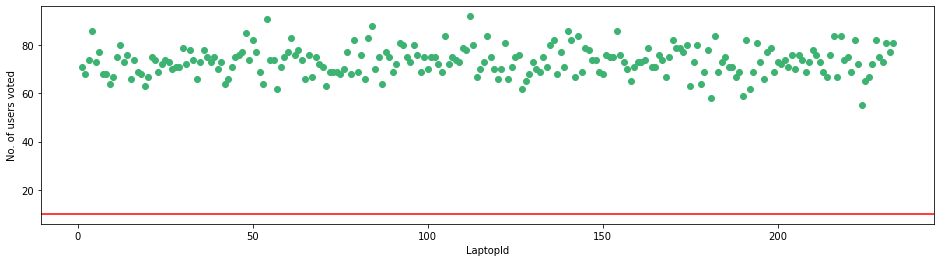

In [8]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('LaptopId')
plt.ylabel('No. of users voted')
plt.show()

In [9]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

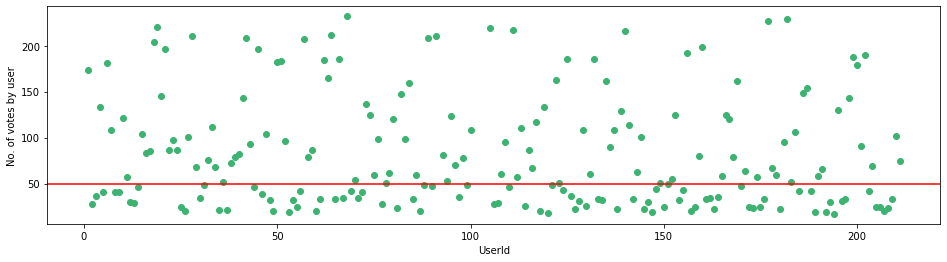

In [10]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_laptop_voted.index,no_laptop_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [11]:
all_genres=laptop['genres'].str.split("|",expand=True)
all_genres.columnns=['genres'+str(i) for i in all_genres.columns]
all_genres['processor']=all_genres.iloc[:,0]
all_genres['Ram']=all_genres.iloc[:,1]
all_genres['Hard-disk']=all_genres.iloc[:,2]
all_genres['Graphics card']=all_genres.iloc[:,3]
all_genres.drop(all_genres.iloc[:, 0:4], inplace = True, axis = 1)
laptop=pd.concat([laptop,all_genres],axis=1)
laptop.drop(['genres'], axis = 1, inplace = True) 
laptop

<ipython-input-11-50e4b81a92b4>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  all_genres.columnns=['genres'+str(i) for i in all_genres.columns]


,laptop_id,laptop_title,processor,Ram,Hard-disk,Graphics card
0,1,Notebook 14-df0008nx,core i3,4 GB ram,1 TB HDD,GTX 1660
1,2,IdeaPad 330S-14IKB,core i5,4 GB ram,500 GB HDD,GTX 1030
2,3,MateBook D Volta,core i7,8 GB ram,1 TB HDD,GTX 1050 ti
3,4,Inspiron 15 3567,core i3,4 GB ram,1TB HDD,GTX 730
4,5,VivoBook 15 X510UR,core i5,8 GB ram,500 GB HDD,intel HD Graphics
...,...,...,...,...,...,...
199,229,IdeaPad 320-15IKBRN,core i5,8 GB ram,500 GB HDD,intel HD Graphics
200,230,MateBook D,core i7,8 GB ram,1 TB HDD,GTX 1050 ti
201,231,MacBook Pro (Retina + Touch Bar),core i5,8 GB ram,500 GB HDD,intel HD Graphics
202,232,MacBook Pro (Retina + Touch Bar),core i7,8 GB ram,1 TB HDD,GTX 1050 ti


In [12]:
final_dataset=final_dataset.loc[:,no_laptop_voted[no_laptop_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,191,195,198,199,200,201,202,204,210,211
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,...,3.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,0.0,3.5
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,3.5,...,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0
3,5.0,5.0,4.0,0.0,0.0,0.0,3.5,0.0,0.0,3.0,...,0.0,3.0,5.0,0.0,2.5,0.0,3.0,0.0,0.0,3.5
4,5.0,4.0,4.0,0.0,0.5,0.0,4.0,0.0,2.0,4.5,...,5.0,0.0,3.0,4.0,4.0,0.0,0.0,2.0,0.0,4.5
5,5.0,5.0,5.0,5.0,4.0,0.0,0.0,4.5,4.0,3.0,...,5.0,4.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,3.0,0.0,5.0,4.0,5.0,0.0,0.0,5.0,0.0,3.0,...,0.0,3.0,3.0,0.0,4.0,5.0,5.0,0.0,4.5,0.0
230,5.0,0.0,3.0,0.0,0.0,0.0,0.0,4.5,2.5,3.5,...,0.0,0.0,5.0,3.0,4.0,0.0,4.0,0.0,4.5,0.0
231,3.0,5.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,4.5,...,4.0,4.0,1.0,0.0,0.0,5.0,4.0,5.0,4.5,0.0


In [13]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [14]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [15]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [16]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [60]:
def get_laptop_recommendation(laptop_title):
    n_laptop_to_reccomend = 3
    laptop_list = laptop[laptop['laptop_title'].str.contains(laptop_title)]  
    if len(laptop_list):        
        laptop_idx= laptop_list.iloc[0]['laptop_id']
        laptop_idx = final_dataset[final_dataset['laptop_id'] == laptop_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[laptop_idx],n_neighbors=n_laptop_to_reccomend+1)    
        rec_laptop_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_laptop_indices:
            laptop_idx = final_dataset.iloc[val[0]]['laptop_id']
            idx = laptop[laptop['laptop_id'] == laptop_idx].index
            recommend_frame.append({'laptop_title':laptop.iloc[idx]['laptop_title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_laptop_to_reccomend+1))
        return df
    else:
        
        return "No laptop found. Please check your input"

In [61]:
get_laptop_recommendation('Swift 5')

,laptop_title,Distance
1,IdeaPad 330-15IKBR,0.298799
2,MacBook,0.293316
3,MateBook D Volta,0.292914


In [62]:
get_laptop_recommendation('Notebook 14-df0008nx')

,laptop_title,Distance
1,Pavilion 15-cs0000nx,0.321630
2,VivoBook 15 X512UF,0.320421
3,XPS 15 9570,0.317702


In [63]:
get_laptop_recommendation('X543UB')

,laptop_title,Distance
1,MacBook Pro (Retina + Touch Bar),0.340323
2,MacBook Pro (Retina + Touch Bar),0.319536
3,MacBook Pro (Retina + Touch Bar)_2,0.282401
